# Explorations of the LSST Baseline Observational Strategy/Footprint

### Rubin OpSim Comments
The opsim software has undergone recent development.  There are now built-in calls to several standard packages.  

### Rubin Footprint Versions
Publicly available footprint run data are provided at these sites: http://astro-lsst-01.astro.washington.edu:8080/ and https://s3df.slac.stanford.edu/data/rubin/sim-data/. The current footprint version appears to be *v3.0* (with apparent work being done on v3.1; May 2023).

## 1. Calculate and Visualize Total Number of Visits Over Survey Footprint for 10 year-period

In [1]:
# Import requisite opsim software packages as well as a few utility packages
import rubin_sim
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
from os.path import splitext, basename, join

In [2]:
# Sanity check and verification of current rubin opsim version
rubin_sim.__version__

'1.1.1'

In [3]:
# Load current baseline footprint and perform additional verification
opsim_db = get_baseline()
run_name = splitext(basename(opsim_db))[0]
print(f"Code employs {run_name} and is read from {opsim_db}")

Code employs baseline_v3.0_10yrs and is read from /Users/jsobeck/rubin_sim_data/sim_baseline/baseline_v3.0_10yrs.db


In [4]:
# Specify three neceessary MAF query inputs: metric, slicer, and constraint(s)
metric = maf.metrics.CountMetric(col='observationStartMJD', metric_name='Nvisits')
nside = 64 # HEALPix grid resolution
slicer = maf.slicers.HealpixSlicer(nside=nside)
constraint = None

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [5]:
# Generate the metric bundle
bundle = maf.MetricBundle(metric, slicer, constraint, run_name=run_name)

In [6]:
# Specify an output directory and generate bundle group (i.e., combine the metric bundle with the database 
# to form a metric bundle group). 
output_dir = 'ini_nvisits'
bg = maf.MetricBundleGroup({'nvisits': bundle}, opsim_db, out_dir=output_dir)

In [7]:
# Perform the metric calculation
bg.run_all()

/Users/jsobeck/opt/anaconda3/envs/rubin/lib/python3.10/site-packages/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 1239 bins, returning 200
  warnings.warn(


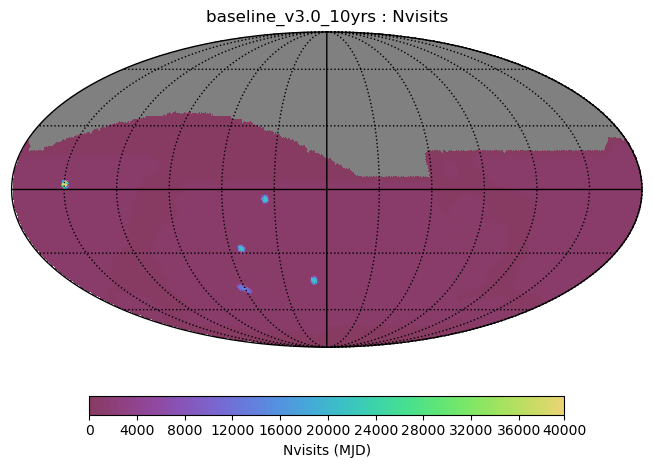

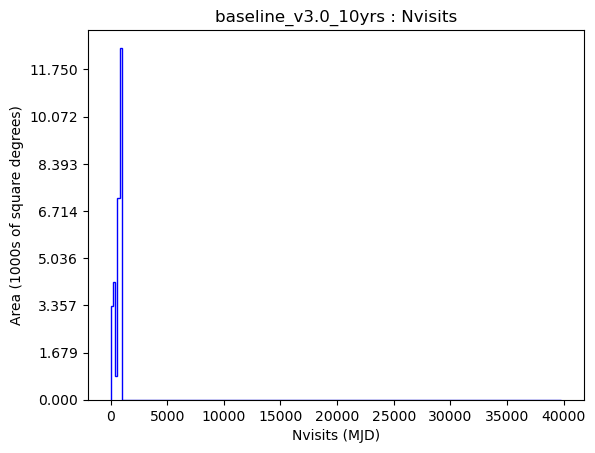

In [8]:
# Generate the two associated plots (which includes an equal-area Mollweide projection in equatorial coordinates as
# well as a plot of visit distributions in terms of field areas).
bg.plot_all(closefigs=False)

/Users/jsobeck/opt/anaconda3/envs/rubin/lib/python3.10/site-packages/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 1239 bins, returning 200
  warnings.warn(


{'SkyMap': 1, 'Histogram': 2}

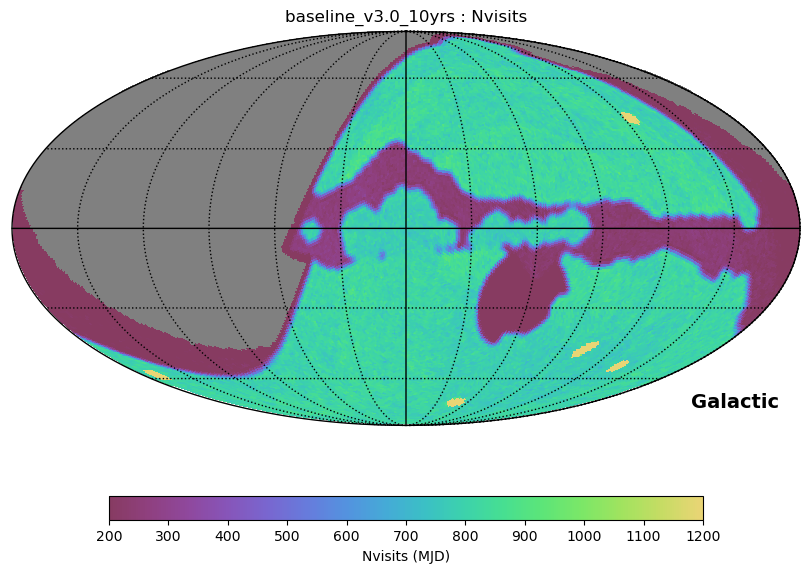

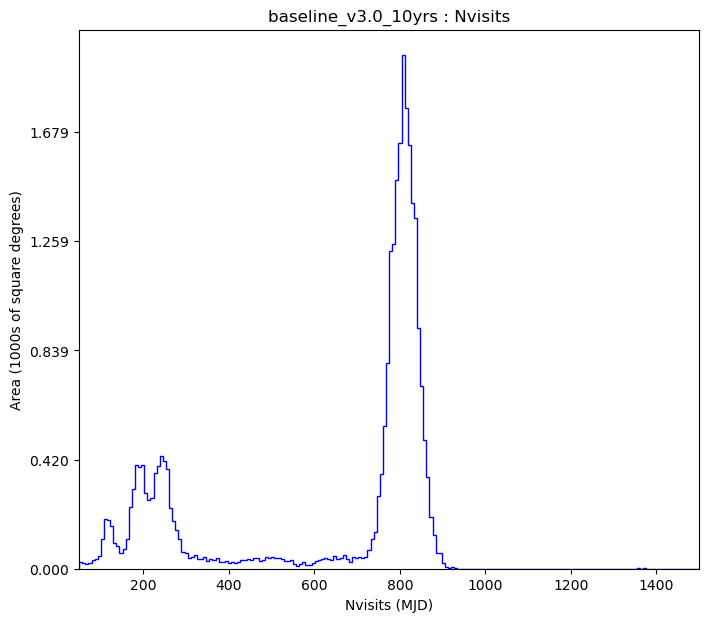

In [14]:
# Rescale the color mapping and values of the plot (this step de-emphasizes the deep drilling fields).  
# Redraw in Galactic Coordinates (as opposed to equatorial/celestial) 
plot_dict = {'color_min': 200, 'color_max': 1200, 'x_min':50, 'x_max':1500, 'coord': 'CG', 'rot': (0, 0, 0)}
bundle.set_plot_dict(plot_dict)
bundle.plot()

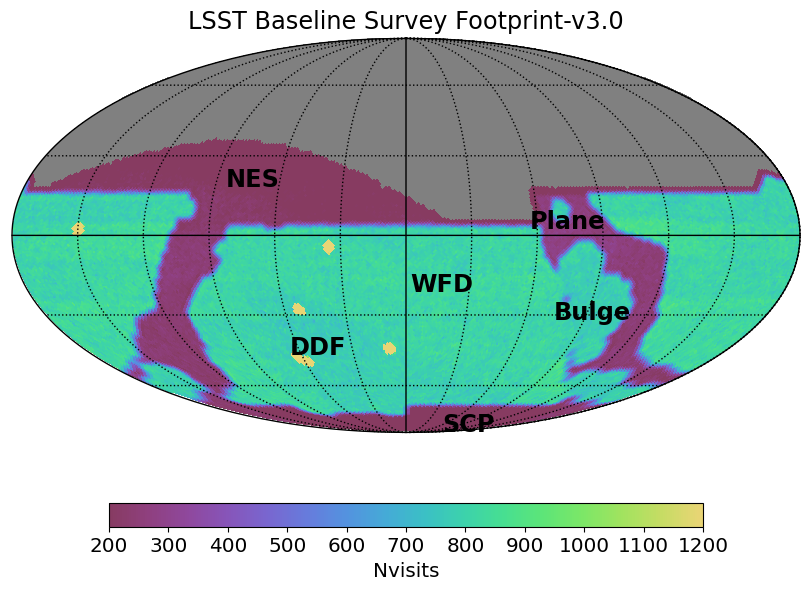

In [11]:
# Produce a region-labeled version of the above plot.  The full functionality of matplotlib pyplot must now be invoked.
import matplotlib.pyplot as plt
figformat = 'pdf'
#ph = maf.PlotHandler(savefig=False, figformat=figformat, thumbnail=False, dpi=270, out_dir=output_dir)
ph = maf.PlotHandler(savefig=False, thumbnail=False, dpi=600, out_dir=output_dir)
ph.set_metric_bundles([bundle])
ph.plot(plot_func=maf.plots.HealpixSkyMap(),
        plot_dicts={'color_min': 200, 'color_max':1200, 'figsize': (8, 7),  'nTicks': 7,
                    'x_min':50, 'x_max':1500,
                   'labelsize': 'x-large', 'fontsize':'x-large', 'xlabel': "Nvisits"})
plt.figtext(0.51, 0.45, r'WFD', fontsize='xx-large', fontweight='bold')
plt.figtext(0.28, 0.6, r'NES', fontsize='xx-large', fontweight='bold')
plt.figtext(0.69, 0.41, r'Bulge', fontsize='xx-large', fontweight='bold')
plt.figtext(0.66, 0.54, r'Plane', fontsize='xx-large', fontweight='bold')
plt.figtext(0.55, 0.25, r'SCP', fontsize='xx-large', fontweight='bold')
plt.figtext(0.36, 0.36, r'DDF', fontsize='xx-large', fontweight='bold')
plt.title(f'LSST Baseline Survey Footprint-v3.0', fontsize='xx-large', fontweight='normal')
# To retain the labeling, the figure must be saved separately.
plt.savefig(join(output_dir, f'{opsim_db}_nvisits.{figformat}' ), 
            facecolor='w', edgecolor='w', bbox_inches='tight',dpi=600, format=figformat)

/Users/jsobeck/opt/anaconda3/envs/rubin/lib/python3.10/site-packages/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 1239 bins, returning 200
  warnings.warn(


{'SkyMap': 1, 'Histogram': 2}

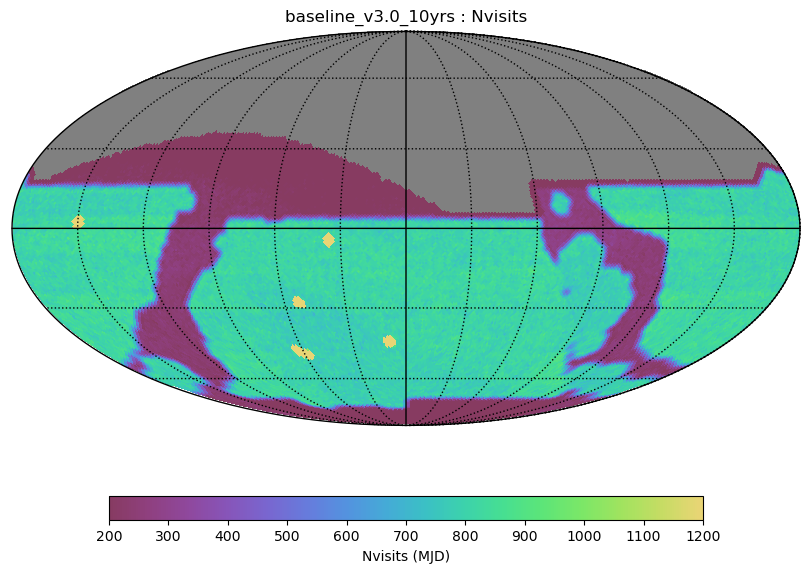

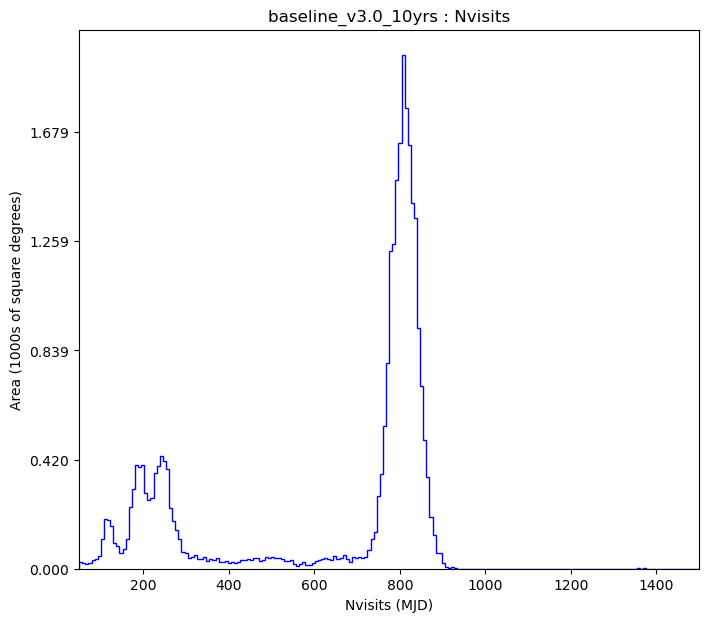

In [12]:
bundle.set_plot_dict(
    {
        "colorMin": 200,
        "colorMax": 1200,    
        "figsize": (8, 7)
    }
) 
bundle.plot()

## 2. Customize Visualization Style 

In [18]:
# With the customization, import of matplotlib and associated plotting pacakges is necessary 
